In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("D:\sem 6\ML\insurance claim pred\insurance2.csv")

In [3]:
dataset


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [4]:
dataset.shape

(1338, 8)

In [5]:
dataset.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
# Descriptive statistics for numerical columns
numerical_stats = dataset[['age', 'bmi', 'children', 'charges']].describe()

# Descriptive statistics for categorical columns
categorical_stats = dataset[['sex', 'smoker', 'region', 'insuranceclaim']].astype('category').describe()

print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)


Descriptive Statistics for Numerical Columns:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Descriptive Statistics for Categorical Columns:
         sex  smoker  region  insuranceclaim
count   1338    1338    1338            1338
unique     2       2       4               2
top        1       0       2               1
freq     676    1064     364             783


In [7]:
# Selecting categorical columns
categorical_columns = ['sex', 'smoker', 'region', 'insuranceclaim']

# Computing summary statistics
summary_stats = pd.DataFrame()

for col in categorical_columns:
    summary_stats[col] = dataset[col].value_counts()

print("Summary Statistics for Categorical Columns:")
print(summary_stats)


Summary Statistics for Categorical Columns:
     sex  smoker  region  insuranceclaim
sex                                     
1    676     274     325             783
0    662    1064     324             555


Exploratory Data Analysis (EDA)

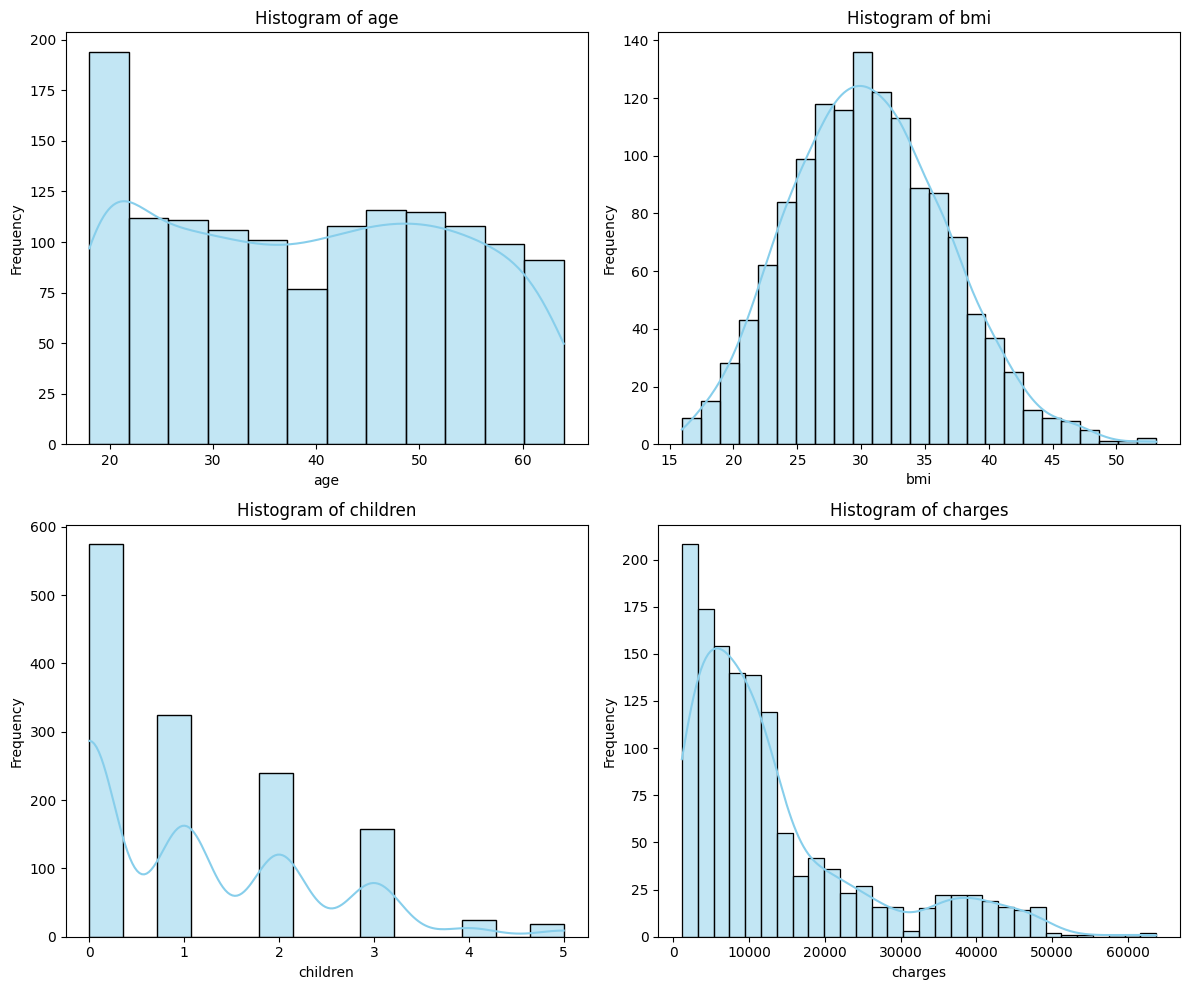

In [8]:
# Selecting numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting histograms for numerical variables
for i, col in enumerate(numerical_columns):
    sns.histplot(dataset[col], ax=axs[i//2, i%2], kde=True, color='skyblue')
    axs[i//2, i%2].set_title(f'Histogram of {col}')
    axs[i//2, i%2].set_xlabel(col)
    axs[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# # Plotting box plots for numerical variables
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# for i, col in enumerate(numerical_columns):
#     sns.boxplot(x=dataset[col], ax=axs[i//2, i%2], color='lightgreen')
#     axs[i//2, i%2].set_title(f'Boxplot of {col}')
#     axs[i//2, i%2].set_xlabel(col)

# plt.tight_layout()
# plt.show()

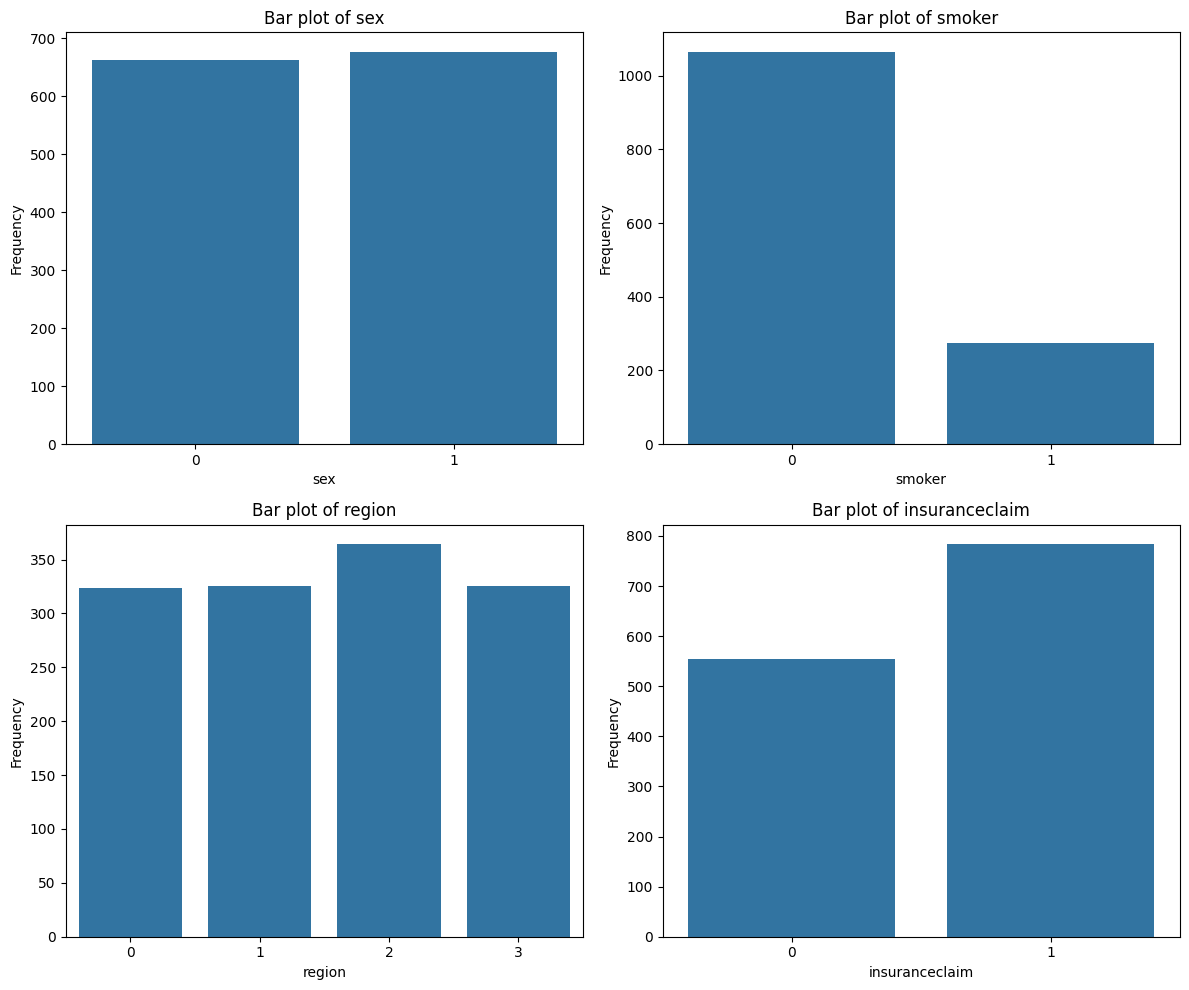

In [10]:
# Selecting categorical columns
categorical_columns = ['sex', 'smoker', 'region', 'insuranceclaim']

# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting bar plots for categorical variables
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=dataset, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Bar plot of {col}')
    axs[i//2, i%2].set_xlabel(col)
    axs[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


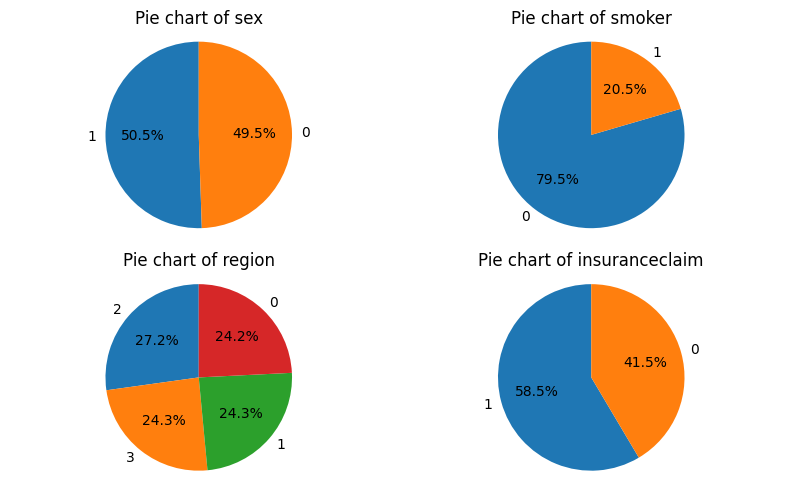

In [11]:
# Selecting categorical columns
categorical_columns = ['sex', 'smoker', 'region', 'insuranceclaim']

# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

# Plotting pie charts for categorical variables
for i, col in enumerate(categorical_columns):
    category_counts = dataset[col].value_counts()
    axs[i//2, i%2].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i//2, i%2].set_title(f'Pie chart of {col}')
    axs[i//2, i%2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


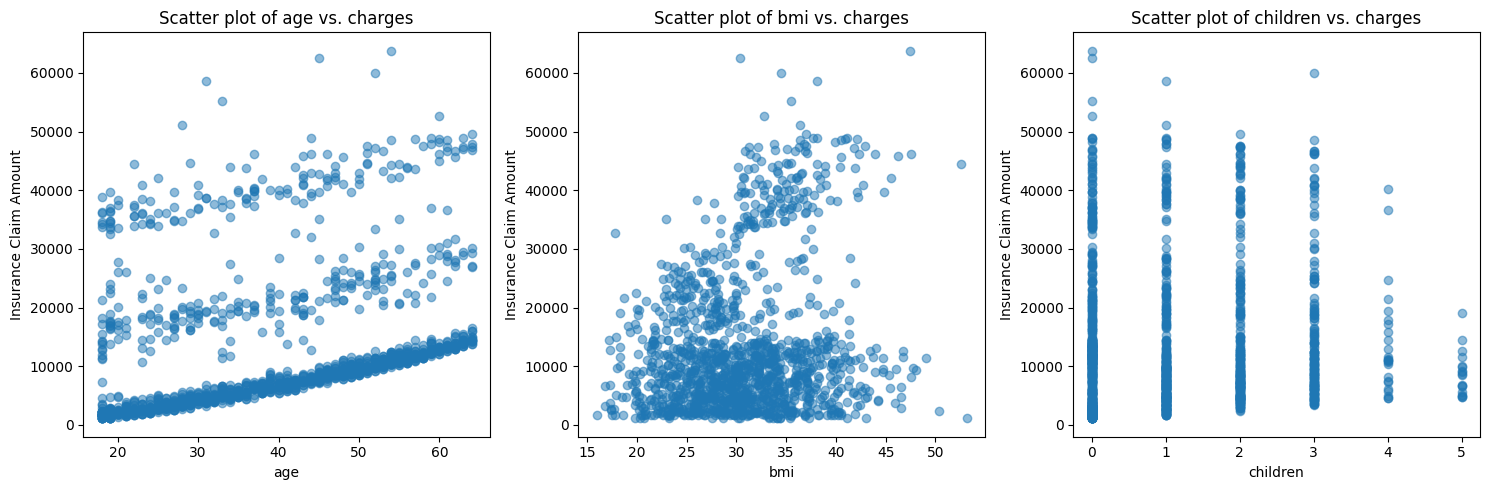

In [12]:
# Scatter plot between numerical variables and insurance claim amount
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting scatter plots
for i, col in enumerate(['age', 'bmi', 'children']):
    axs[i].scatter(dataset[col], dataset['charges'], alpha=0.5)
    axs[i].set_title(f'Scatter plot of {col} vs. charges')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Insurance Claim Amount')

plt.tight_layout()
plt.show()


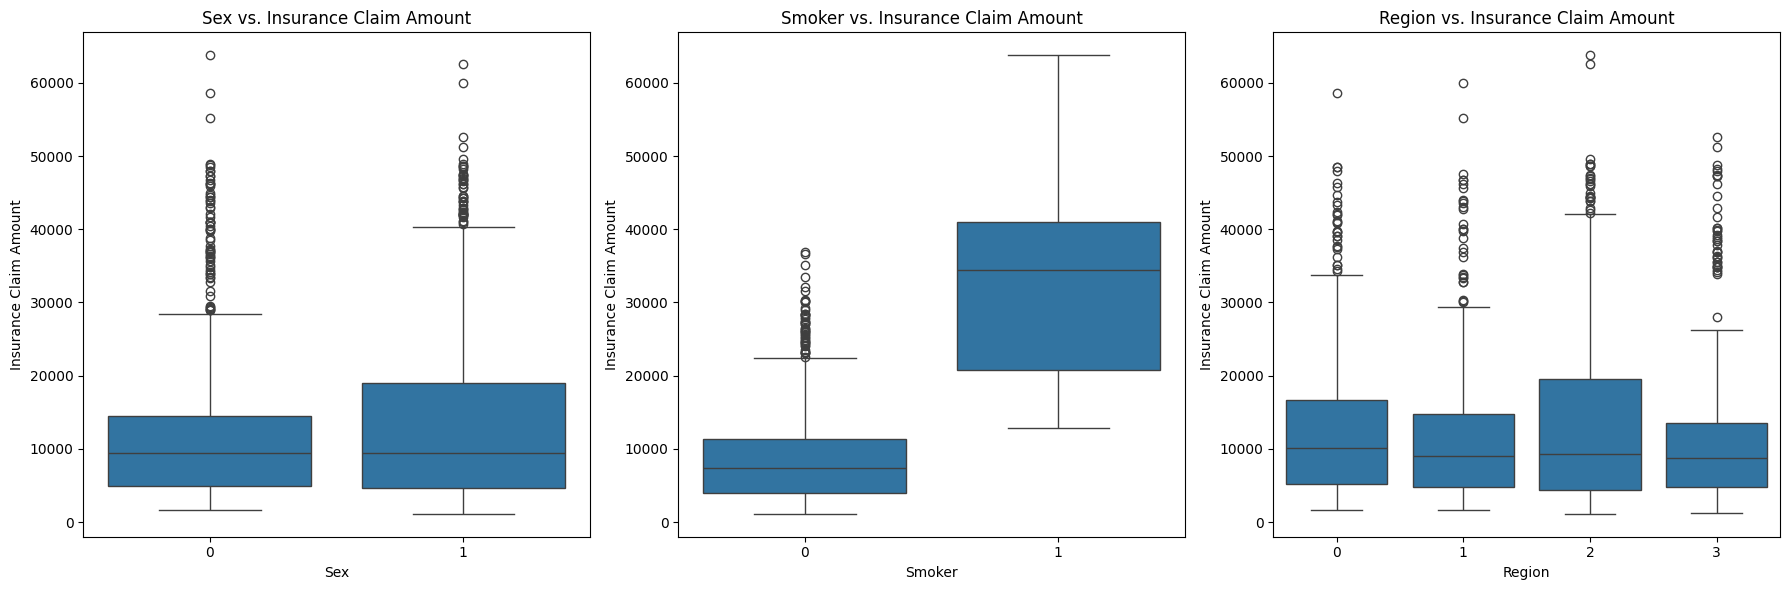

In [13]:
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting box plots or violin plots for categorical variables vs. insurance claim amount
for i, col in enumerate(['sex', 'smoker', 'region']):
    sns.boxplot(x=col, y='charges', data=dataset, ax=axs[i])
    # Uncomment the line below to use violin plots instead
    # sns.violinplot(x=col, y='charges', data=dataset, ax=axs[i])
    axs[i].set_title(f'{col.capitalize()} vs. Insurance Claim Amount')
    axs[i].set_xlabel(col.capitalize())
    axs[i].set_ylabel('Insurance Claim Amount')

plt.tight_layout()
plt.show()


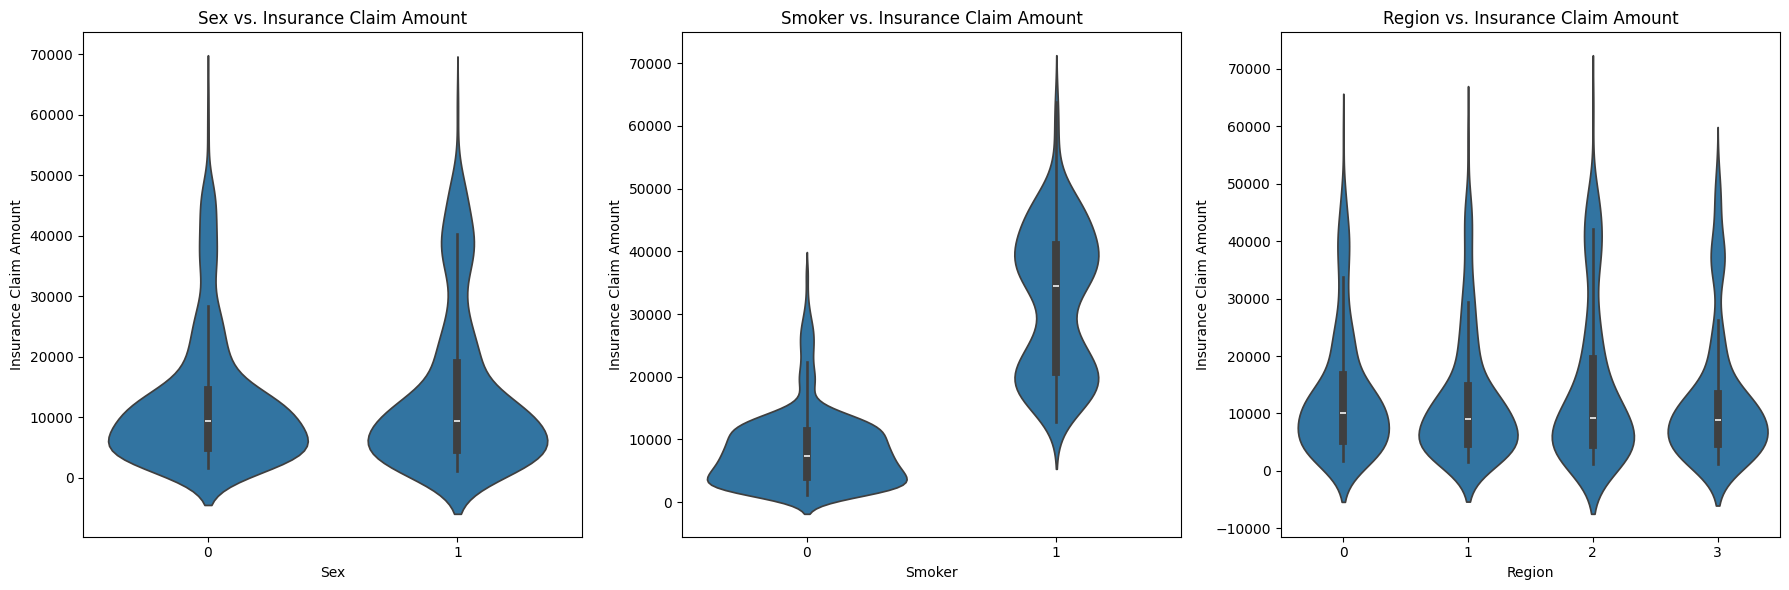

In [14]:
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting violin plots for categorical variables vs. insurance claim amount
for i, col in enumerate(['sex', 'smoker', 'region']):
    sns.violinplot(x=col, y='charges', data=dataset, ax=axs[i])
    axs[i].set_title(f'{col.capitalize()} vs. Insurance Claim Amount')
    axs[i].set_xlabel(col.capitalize())
    axs[i].set_ylabel('Insurance Claim Amount')

plt.tight_layout()
plt.show()


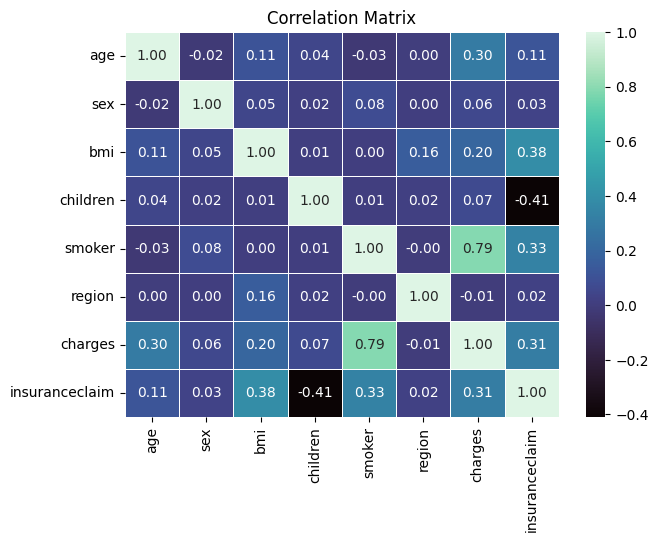

In [15]:
# Computing the correlation matrix
correlation_matrix = dataset.corr()

# Plotting the heatmap with a custom color scheme
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\nyoja\AppData\Local\Temp\ipykernel_10492\3091066857.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, color='skyblue', palette='Blues')


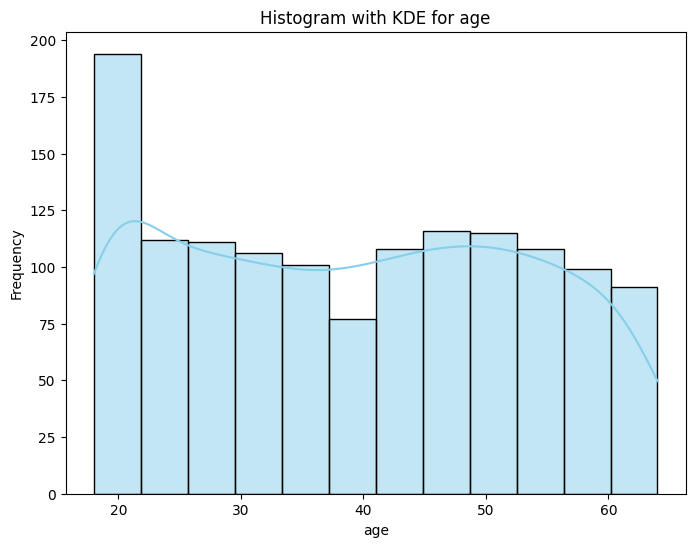

In [16]:
def plot_histogram_with_kde(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, color='skyblue', palette='Blues')
    plt.title(f'Histogram with KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram_with_kde(dataset, 'age')

c:\Users\nyoja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


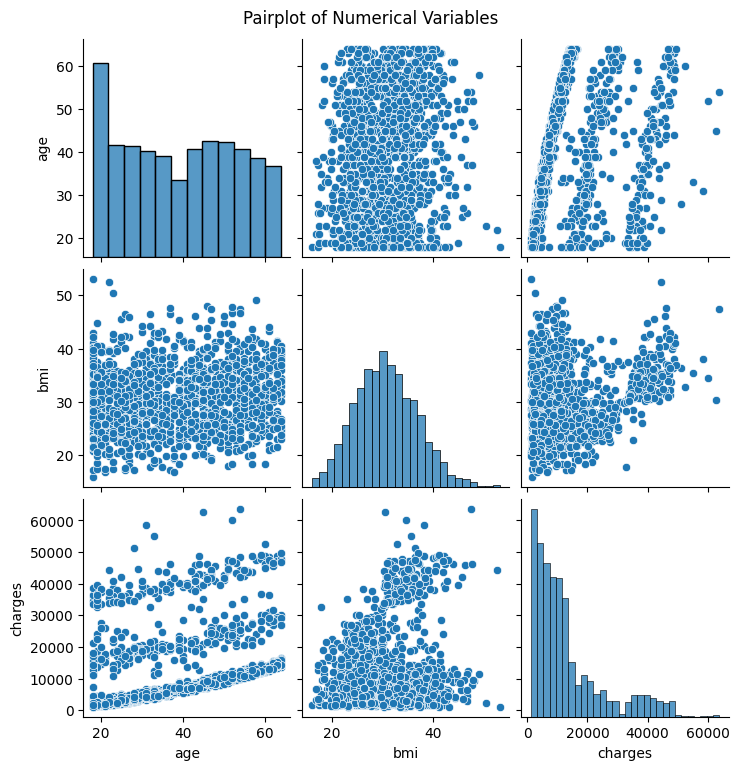

In [17]:
def plot_pairplot(data, columns):
    sns.pairplot(data[columns])
    plt.suptitle('Pairplot of Numerical Variables', y=1.02)
    plt.show()
plot_pairplot(dataset, ['age', 'bmi', 'charges'])



Data Imbalancing on Dependant Variable

In [18]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [19]:
from imblearn.over_sampling import SMOTE
s1=SMOTE()
x_data,y_data=s1.fit_resample(x,y)

In [20]:
from collections import Counter
print(Counter(y_data))

Counter({1: 783, 0: 783})


Standardization of Dataset

In [21]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_data=sd.fit_transform(x_data)

In [22]:
x_data1=x_data.mean()
x_data2=round(x_data1)
x_data2

0

Training and Evaluating Classification Models

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=11)

In [24]:
# testing dataset
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

y_log=l1.predict(x_test)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_log,y_test)*100
ac

88.21656050955414

In [25]:
# Training dataset
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

y_log_train=l1.predict(x_train)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_log_train,y_train)*100
ac

# Low bias And Low Variance

89.5367412140575

In [26]:
from sklearn.naive_bayes import GaussianNB
g1=GaussianNB()
g1.fit(x_train,y_train)

y_naive=g1.predict(x_test)

from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_naive,y_test)*100
ac1

69.42675159235668

In [27]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
d1=DecisionTreeClassifier(criterion='gini',max_depth=5)
d1.fit(x_train,y_train)

y_dt=d1.predict(x_test)

from sklearn.metrics import accuracy_score
ac2=accuracy_score(y_dt,y_test)*100
ac2

92.67515923566879

In [28]:

from sklearn.tree import DecisionTreeClassifier
d1=DecisionTreeClassifier(criterion='gini',max_depth=5)
d1.fit(x_train,y_train)

y_dt1=d1.predict(x_train)

from sklearn.metrics import accuracy_score
ac21=accuracy_score(y_dt1,y_train)*100
ac21


94.4888178913738

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(l1,x_train,y_train,cv=5)

array([0.86055777, 0.87649402, 0.908     , 0.912     , 0.896     ])

Regression Model Training, Evaluation, and Cross-Validation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Step 1: Data Preprocessing
X = dataset.drop(['charges'], axis=1)
y = dataset['charges']

# Include 'insuranceclaim' in the feature set
X = dataset.drop(['charges'], axis=1)
y = dataset['charges']

X['insuranceclaim'] = dataset['insuranceclaim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Selection and Training
# Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model Performance:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R2): {r2}')

print('Linear Regression Model Evaluation:')
evaluate_model(linear_reg_model, X_test, y_test)

print('\nRandom Forest Regressor Model Evaluation:')
evaluate_model(rf_model, X_test, y_test)

# Step 4: Cross-Validation
def cross_validate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    print('Cross-Validation Mean Absolute Error (MAE):', -cv_scores.mean())

print('\nCross-Validation for Linear Regression Model:')
cross_validate_model(linear_reg_model, X, y)

print('\nCross-Validation for Random Forest Regressor Model:')
cross_validate_model(rf_model, X, y)


Linear Regression Model Evaluation:
Model Performance:
Mean Absolute Error (MAE): 4202.073483424078
Mean Squared Error (MSE): 33775382.806463
R-squared (R2): 0.7824434217148323

Random Forest Regressor Model Evaluation:
Model Performance:
Mean Absolute Error (MAE): 2562.5985979760576
Mean Squared Error (MSE): 21299024.34410006
R-squared (R2): 0.8628070958168912

Cross-Validation for Linear Regression Model:
Cross-Validation Mean Absolute Error (MAE): 4172.69668366209

Cross-Validation for Random Forest Regressor Model:
Cross-Validation Mean Absolute Error (MAE): 2678.502430126145


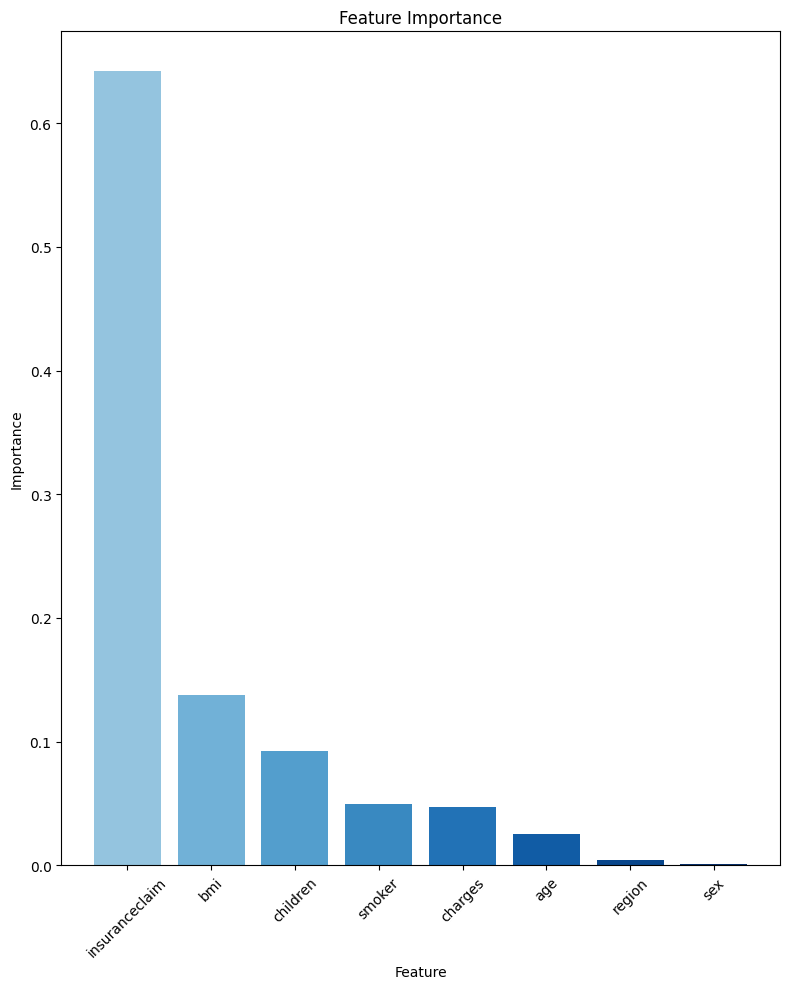

Detailed Insights into Important Features for Prediction:
          Feature  Importance
7  insuranceclaim    0.642049
2             bmi    0.137605
3        children    0.092608
4          smoker    0.049899
6         charges    0.046940
0             age    0.025209
5          region    0.004177
1             sex    0.001512


In [31]:
from sklearn.ensemble import RandomForestClassifier
# Separate features and target variable
X = dataset.drop(columns=['insuranceclaim'])
y = dataset['insuranceclaim']

# Include 'insured claims' in the feature set
X['insuranceclaim'] = dataset['insuranceclaim']  # Replace 'insured claims' with the correct column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
colors = plt.cm.Blues(np.linspace(0.4, 1, len(feature_importance_df)))

# Plot feature importances with gradient shades
plt.figure(figsize=(8, 10))
bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Display detailed insights
print("Detailed Insights into Important Features for Prediction:")
print(feature_importance_df)


In [32]:
X = dataset.drop(columns=['insuranceclaim'])
y = dataset['insuranceclaim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = np.mean(y_test == y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import f1_score

f1_score_value = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score_value)

Accuracy: 0.9253731343283582
F1 score: 0.9255884331157094


Model Evaluation (Regression and Classification)

In [34]:
from sklearn.metrics import mean_squared_error

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model on the training set (already done earlier)

# Make predictions on the holdout set
y_pred_holdout = rf_model.predict(X_holdout)

# Evaluate the model's performance on the holdout set using mean squared error
mse_holdout = mean_squared_error(y_holdout, y_pred_holdout)
print("Mean Squared Error on holdout set:", mse_holdout)


Mean Squared Error on holdout set: 0.07462686567164178


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model on the training set (already done earlier)

# Evaluate the model's performance on the holdout set
y_pred_holdout = rf_model.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print("Accuracy on holdout set:", accuracy_holdout)


Accuracy on holdout set: 0.9253731343283582


In [36]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5)
mean_cv_accuracy = cv_scores.mean()
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)


Mean Cross-Validation Accuracy: 0.9506763933143272


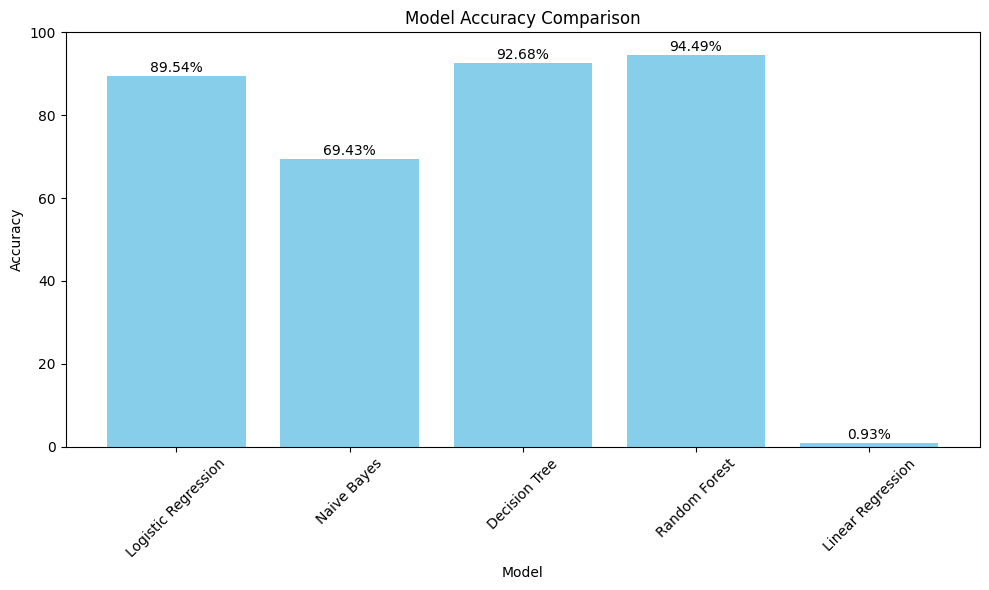

In [39]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracy scores
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Linear Regression']
accuracy_scores = [ac, ac1, ac2, ac21, accuracy_holdout]  # Update with the accuracy scores obtained from your models

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit
plt.tight_layout()

# Adding the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center')

# Display the plot
plt.show()
